# Early-life exposures and later-life health consequences
This workshop will take you through a synthetic dataset to identify associations between early-life exposure to butterbeer and health in later-life.

On Jan 1, 1954, the UK government ended a 10-year long ban on butterbeer. That means that everyone born before Jan 1954 was likely to not be exposed to maternal butterbeer consumption, while those born after Jan 1954 were exposed to maternal butterbeer consumption in utero.

![rdd](butterbeer_plot_R.png)

## Load packages into R

In [220]:
### Load these packages into R. They have different functions that we will use throughout this exercise.
library(broom)
library(dplyr)
library(ggplot2)
library(gtsummary)
library(knitr)
library(purrr)

## Read in data and clean

In [221]:
### Read in data from your computer into R
df = read.csv("witteclass.csv", header = TRUE)

In [222]:
### Visualise the first few rows of the dataframe. This is a good opportunity for us to look
### at the variables we have, the type of variables they are, and other features
head(df)

,id,dob,sex,location,income,car_accidents,diabetes_ever,hypertension_ever,biomarker_1,biomarker_2,biomarker_3,biomarker_4,biomarker_5,biomarker_6,biomarker_7
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,22-Feb-55,f,England,30018,0,1,0,-2.752,0.598,-0.293,-1.793,-1.297,-0.415,0.789
2,2,13-Nov-54,m,England,26807,0,0,0,-1.863,-0.273,-1.030,-0.874,0.902,-0.194,-0.503
3,3,25-Dec-54,f,England,15062,0,0,0,-1.785,-0.324,-0.492,0.273,-0.909,1.679,0.208
4,4,11-Jan-52,m,England,22653,0,1,0,-1.748,-0.247,0.219,0.435,-0.330,-0.260,1.513
5,5,20-Nov-54,f,Wales,24640,0,0,1,-1.649,0.254,0.061,-0.326,1.537,-0.248,-0.517
6,6,18-Feb-52,f,England,25984,0,0,0,-1.624,0.866,2.660,0.310,-0.532,1.048,0.585


In [227]:
### This next block cleans the dataframe a bit. You don't need to look at it too closely

## Fix DOB variable
df$dob = as.Date(df$dob, format = "%d-%b-%y")

## Fix century (because %y makes 55 → 2055)
df$dob[df$dob > Sys.Date()] = df$dob[df$dob > Sys.Date()] - 36525

## Compute age
df$age = as.integer(floor((Sys.Date() - df$dob) / 365.25))

## Make an exposure variable
## We do this by assinging everyone who was born in 1952 and 1953 to 
## the "EXPOSED" group and those born in 1954 and 1955 to the "UNEXPOSED" group

df$birth_year <- as.integer(format(df$dob, "%Y"))

df$exposure[df$birth_year %in% c(1952, 1953)] <- "unexposed"
df$exposure[df$birth_year %in% c(1954, 1955)] <- "exposed"

## Make categorical variables into factors
df = df %>%
  mutate(
    sex = factor(sex),
    location = factor(location),
    diabetes_ever = factor(diabetes_ever),
    hypertension_ever = factor(hypertension_ever),
    exposure = factor(exposure)
  )

In [228]:
### Look at a summary of the data
summary(df)

       id              dob             sex        location      income     
 Min.   :  1.00   Min.   :1952-01-04   f:50   England :60   Min.   :11901  
 1st Qu.: 25.75   1st Qu.:1952-06-28   m:50   France  : 6   1st Qu.:21996  
 Median : 50.50   Median :1953-11-29          Scotland:14   Median :24366  
 Mean   : 50.43   Mean   :1953-10-03          Wales   :20   Mean   :24481  
 3rd Qu.: 75.25   3rd Qu.:1955-01-04                        3rd Qu.:27030  
 Max.   :100.00   Max.   :1955-03-29                        Max.   :34261  
 car_accidents  diabetes_ever hypertension_ever  biomarker_1      
 Min.   :0.00   0:80          0:67              Min.   :-2.75200  
 1st Qu.:0.00   1:20          1:33              1st Qu.:-0.71925  
 Median :0.00                                   Median : 0.11800  
 Mean   :0.03                                   Mean   : 0.00001  
 3rd Qu.:0.00                                   3rd Qu.: 0.60725  
 Max.   :1.00                                   Max.   : 2.11800  

## Analyses

### Descriptives

Let's explore how this exposure varies by different characteristics

In [225]:
# This creates a Table 1 (table of descriptive characteristics by exposure status)
table1 = tbl_summary(
  data = df,            
  by = exposure,     
  include = c(age, sex, location, income, car_accidents, diabetes_ever, hypertension_ever,
              biomarker_1, biomarker_2, biomarker_3, biomarker_4, biomarker_5, biomarker_6, biomarker_7
             ),
    statistic = all_continuous() ~ "{mean} ({sd})"
)

In [229]:
# Visualise Table 1
table1 %>% as_kable()



|**Characteristic** | **exposed**  N = 50 | **unexposed**  N = 50 |
|:------------------|:-------------------:|:---------------------:|
|age                |                     |                       |
|70                 |      43 (86%)       |        0 (0%)         |
|71                 |       7 (14%)       |        0 (0%)         |
|72                 |       0 (0%)        |        6 (12%)        |
|73                 |       0 (0%)        |       44 (88%)        |
|sex                |                     |                       |
|f                  |      25 (50%)       |       25 (50%)        |
|m                  |      25 (50%)       |       25 (50%)        |
|location           |                     |                       |
|England            |      31 (62%)       |       29 (58%)        |
|France             |      2 (4.0%)       |       4 (8.0%)        |
|Scotland           |       6 (12%)       |        8 (16%)        |
|Wales              |      11 (22%)       |   

In [230]:
### Further visualisations of biomarkers

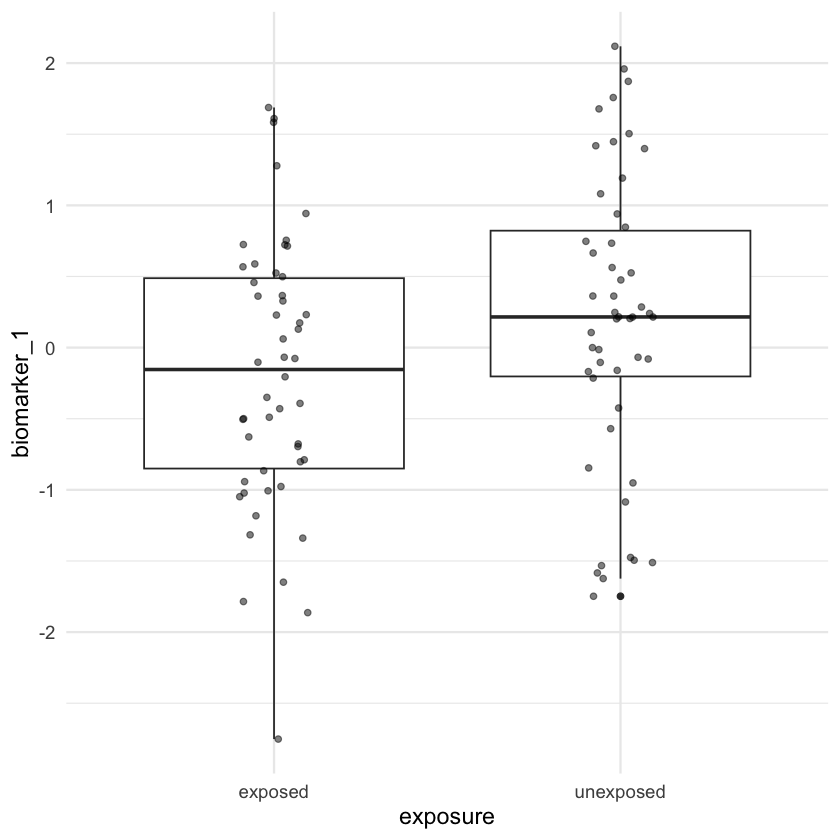

In [231]:
ggplot(df, aes(x = exposure, y = biomarker_1)) +
  geom_boxplot() +
  geom_jitter(width = 0.1, alpha = 0.5) +
  theme_minimal(base_size = 14)

### Associations

Let's remove people born in France because this exposure was only in the UK

In [197]:
df_analysis = df %>%
  filter(location != "France")

Let's now look at the association between exposure and different later-life outcomes

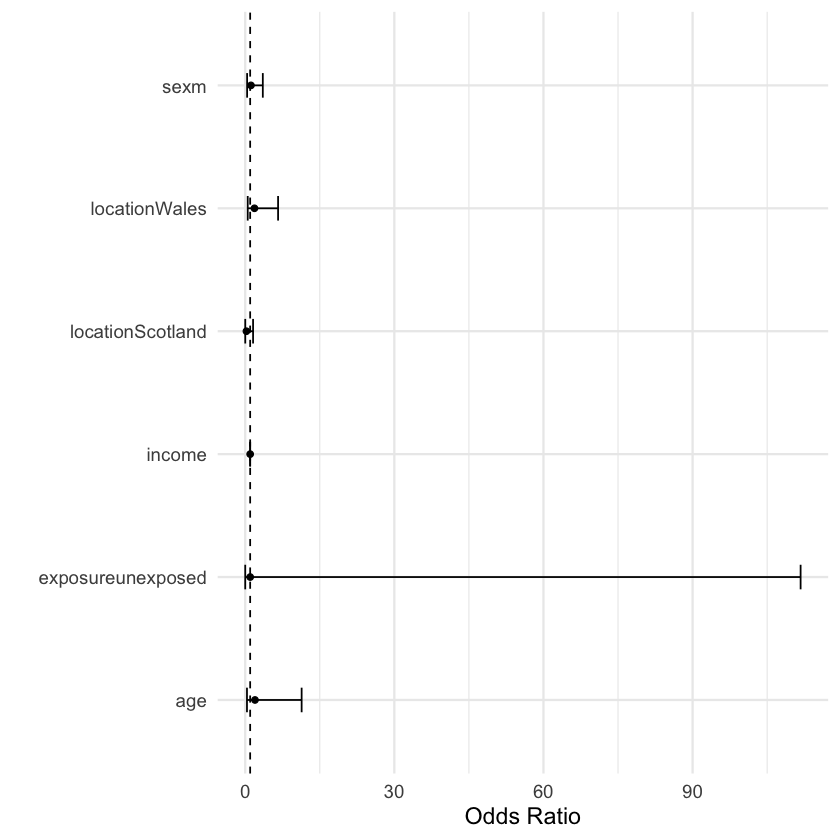

In [235]:
model_diabetes = glm(diabetes_ever ~ exposure + age + sex + location + income,
             data = df_analysis,
             family = binomial)

# tidy results
diabetes_result <- tidy(model_diabetes, conf.int = TRUE, exponentiate = TRUE) %>%
  filter(term != "(Intercept)")

# forest plot
ggplot(diabetes_result, aes(y = term, x = estimate, xmin = conf.low, xmax = conf.high)) +
  geom_point() +
  geom_errorbarh(height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed") +
  xlab("Odds Ratio") +
  ylab("") +
  theme_minimal(base_size = 14)

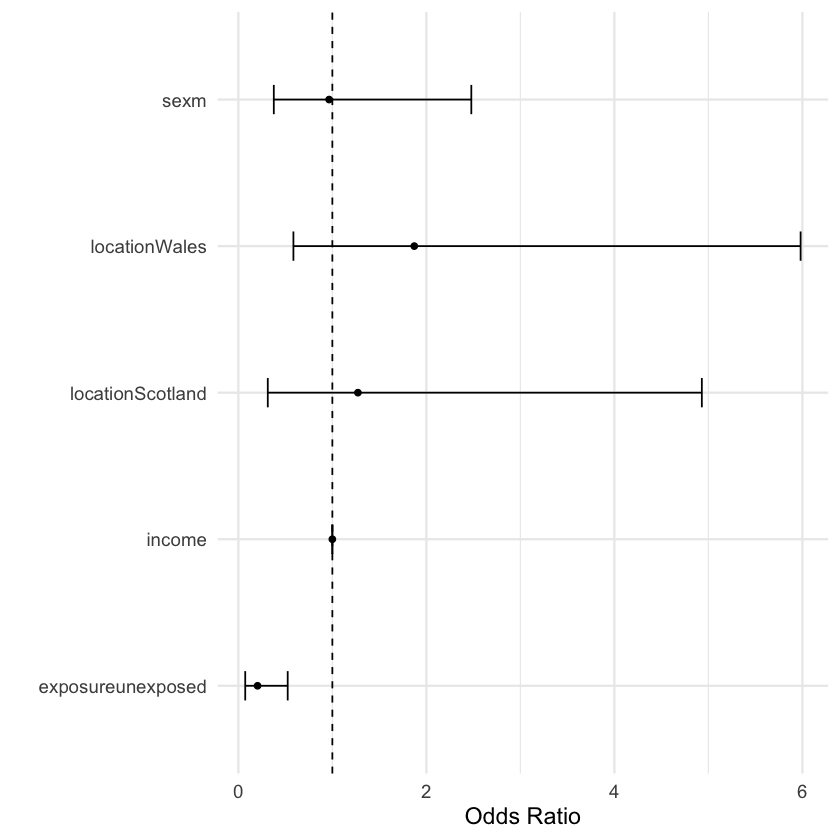

In [253]:
model_hypertension = glm(hypertension_ever ~ exposure + sex + location + income,
             data = df_analysis,
             family = binomial)

# tidy results
hypertension_result <- tidy(model_hypertension, conf.int = TRUE, exponentiate = TRUE) %>%
  filter(term != "(Intercept)")

# forest plot
ggplot(hypertension_result, aes(y = term, x = estimate, xmin = conf.low, xmax = conf.high)) +
  geom_point() +
  geom_errorbarh(height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed") +

  xlab("Odds Ratio") +
  ylab("") +
  theme_minimal(base_size = 14)

In [254]:
model_car = lm(car_accidents ~ exposure, data = df_analysis)
model_biomarker1 = lm(biomarker_1 ~ exposure  + sex + income + location, data = df_analysis)
model_biomarker2 = lm(biomarker_2 ~ exposure  + sex + income + location, data = df_analysis)
model_biomarker3 = lm(biomarker_3 ~ exposure  + sex + income + location, data = df_analysis)
model_biomarker4 = lm(biomarker_4 ~ exposure  + sex + income + location, data = df_analysis)
model_biomarker5 = lm(biomarker_5 ~ exposure  + sex + income + location, data = df_analysis)
model_biomarker6 = lm(biomarker_6 ~ exposure  + sex + income + location, data = df_analysis)
model_biomarker7 = lm(biomarker_7 ~ exposure  + sex + income + location, data = df_analysis)

In [255]:
summary(model_biomarker1)


Call:
lm(formula = biomarker_1 ~ exposure + sex + income + location, 
    data = df_analysis)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57613 -0.68773  0.04668  0.66705  1.87856 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)       -2.213e-01  6.147e-01  -0.360   0.7197  
exposureunexposed -4.041e-01  2.158e-01  -1.872   0.0645 .
sexm               9.872e-02  2.143e-01   0.461   0.6461  
income             1.497e-05  2.469e-05   0.606   0.5458  
locationScotland  -5.327e-03  3.148e-01  -0.017   0.9865  
locationWales      3.231e-03  2.671e-01   0.012   0.9904  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.029 on 88 degrees of freedom
Multiple R-squared:  0.04107,	Adjusted R-squared:  -0.01342 
F-statistic: 0.7537 on 5 and 88 DF,  p-value: 0.5856


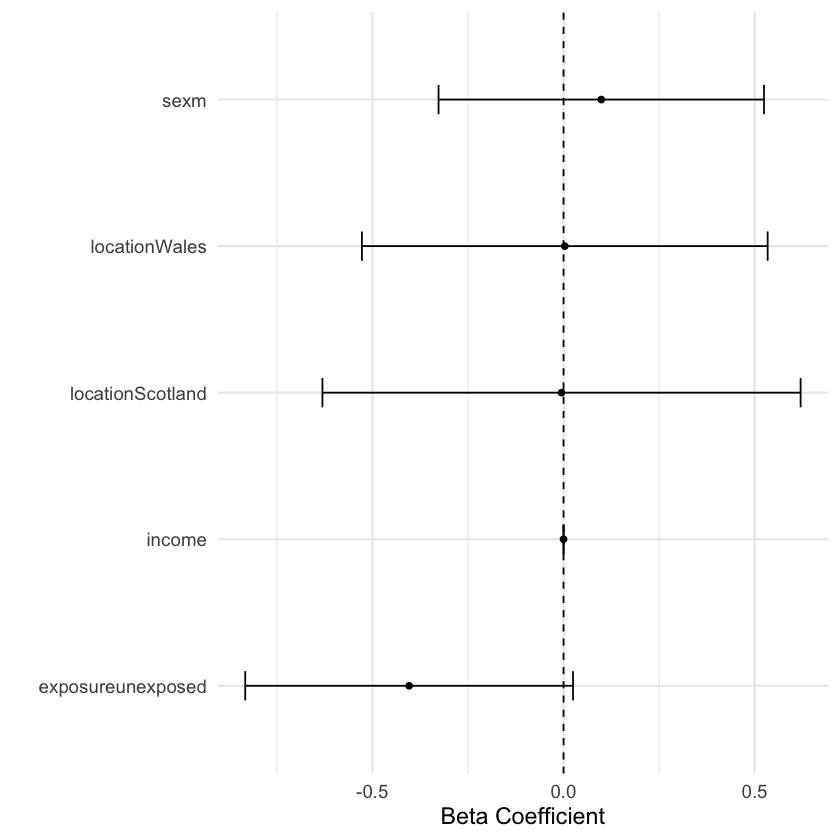

In [256]:
# tidy results
result <- tidy(model_biomarker1, conf.int = TRUE) %>%
  filter(term != "(Intercept)")

# forest plot
ggplot(result, aes(y = term, x = estimate, xmin = conf.low, xmax = conf.high)) +
  geom_point() +
  geom_errorbarh(height = 0.2) +
  geom_vline(xintercept = 0, linetype = "dashed") +
  xlab("Beta Coefficient") +
  ylab("") +
  theme_minimal(base_size = 14)